In [37]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

optimized step
optimized step
optimized step


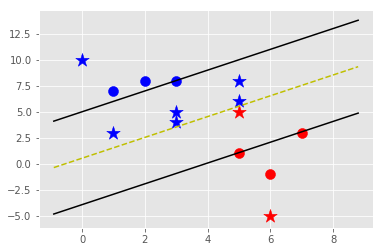

In [46]:
style.use('ggplot')

class support_vector_machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors={1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
     #train       
    def fit(self, data):
        self.data=data
        opt_dict={}
        transforms=[[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = []
        for yi in self.data:
            for fratureset in self.data[yi]:
                for feature in fratureset:
                    all_data.append(feature)
        self.max_feature_value=max(all_data)
        self.min_feature_value=min(all_data)   
        all_data=None
        step_sizes=[self.max_feature_value * 0.1,self.max_feature_value * 0.01,self.max_feature_value * 0.001]
        
        b_range_multiple=5
        b_multiple=5
        last_optimum= self.max_feature_value*10
        
        for step in step_sizes:
            w =np.array([last_optimum , last_optimum])
            optimized= False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple,
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t =w*transformation
                        found_option= True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option= False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            
                if w[0] < 0:
                    optimized = True
                    print('optimized step')
                else:
                    w= w-step
            norms= sorted([n for n in opt_dict]) 
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1] 
            last_optimum = opt_choice[0][0]+step*2
        
    def predict(self,features):
        #sign(x.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0] ,features[1] , s=200 , marker='*', c=self.colors[classification])
        return classification
    
    def visulaize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]]for i in data_dict]
        
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) /w[1]
        datarange = (self.min_feature_value*0.9 ,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1] 
        
        
        npsv1 = hyperplane(hyp_x_min,self.w, self.b , 1)
        npsv2 = hyperplane(hyp_x_max,self.w, self.b , 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[npsv1,npsv2] , 'k')
        
        psv1 = hyperplane(hyp_x_min,self.w, self.b , -1)
        psv2 = hyperplane(hyp_x_max,self.w, self.b , -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')
        
        db1 = hyperplane(hyp_x_min,self.w, self.b , 0)
        db2 = hyperplane(hyp_x_max,self.w, self.b , 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2] , 'y--')
        
        plt.show()

data_dict= {-1:np.array([[1,7],
                        [2,8],
                        [3,8],]),
            1:np.array([[5,1],
                       [6,-1],
                       [7,3],])}

svm =support_vector_machine()
svm.fit(data=data_dict)
predict_us = [[0,10],
             [1,3],
             [3,4],
             [3,5],
             [5,5],
             [5,6],
             [6,-5],
             [5,8]]

for p in predict_us:
    svm.predict(p)
svm.visulaize()
